In [9]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [36]:
### USER SETTINGS ###
database="/Volumes/mollyT7/MOXA"
# database = "/Volumes/MOLLY256/MOXA/"
# database = "/Users/molly/Desktop"

dates = [
    # "/Users/molly/Desktop/2024-01-26",
    # "2024-02-03",
    "2024-03-13",
    "2024-03-21",
]
devices = sorted([
    "sm00",
    "sm01",
])
exps = {
    # "QUIC-280sec": (6, ["#{:02d}".format(i + 1) for i in range(6)]),
    # "QUIC-300sec": (6, ["#{:02d}".format(i + 1) for i in range(6)]),
    # "QUIC-450sec": (6, ["#{:02d}".format(i + 1) for i in range(6)]),
    "QUIC-1M": (2, ["#{:02d}".format(i + 1) for i in range(2)]),
    "QUIC-5M": (2, ["#{:02d}".format(i + 1) for i in range(2)]),
    "QUIC-10M": (2, ["#{:02d}".format(i + 1) for i in range(2)]),
    "QUIC-inf": (6, ["#{:02d}".format(i + 1) for i in range(6)]),
}

device_to_port = {"sm00": [4200, 4201, 5200, 5201], 
                  "sm01": [4202, 4203, 5202, 5203],
                  "sm02": [4204, 4205, 5204, 5205]}

figure_path = "/Users/molly/Desktop"

In [19]:
def find_stats_files(database, date, exp, device):
    ul_files = []
    dl_files = []
    exp_rounds, exp_list = exps[exp]
    ports = device_to_port.get(device, [])
    for exp_round in exp_list:
        folder_path = os.path.join(database, date, exp, device, exp_round, 'statistics')
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.startswith("ul_statistics"):
                    ul_files.append(os.path.join(root, file))
                if file.startswith("dl_statistics"):
                    dl_files.append(os.path.join(root, file))
    return ul_files, dl_files

In [20]:
def calculate_avg_stats(df):
    avg_total_packets = int(df['total_packets'].mean())
    avg_data_packets  = int(df['total_data_packets'].mean())
    avg_original_pkl  = int(df['original_pkl'].mean())
    avg_reordering_threshold = int(df['reordering_threshold'].mean())
    avg_time_threshold = int(df['time_threshold'].mean())
    avg_real_pkl = int(df['reordering_threshold'].mean()) + int(df['time_threshold'].mean())
    
    return {"total_packets": avg_total_packets,
            "total_data_packets": avg_data_packets,
            "original_pkl": avg_original_pkl,
            "reordering_threshold": avg_reordering_threshold,
            "time_threshold": avg_time_threshold,
            "real_pkl": avg_real_pkl,
            "exec_reordering": int(df['exec_reordering'].mean()),
            "exec_time": int(df['exec_time'].mean()),
            "exec_lat": int(df['exec_reordering'].mean()) + int(df['exec_time'].mean()),
            "reordering_pkl_rate(%)": 0 if avg_real_pkl == 0 else avg_reordering_threshold*100 / avg_real_pkl,
            "time_pkl_rate(%)": 0 if avg_real_pkl == 0 else avg_time_threshold*100 / avg_real_pkl,
            "real_pkl_rate(%)": 0 if avg_original_pkl == 0 else avg_real_pkl*100 / avg_original_pkl,
            "original_packet_loss_rate(%)": avg_original_pkl*100 / avg_total_packets,
            "adjusted_packet_loss_rate(%)": avg_real_pkl*100 / avg_total_packets
            }

In [22]:

all_avg_ul_stats = {}
all_avg_dl_stats = {}
# Iterate over dates, exps, and devices
for exp in exps:
    exp_ul_stats_files = []
    exp_dl_stats_files = []
    for date in dates:
        for device in devices:
            ul_stats_files, dl_stats_files = find_stats_files(database, date, exp, device)
            exp_ul_stats_files.extend(ul_stats_files)
            exp_dl_stats_files.extend(dl_stats_files)
    stats = []
    # Iterate over each file path
    for file_path in exp_ul_stats_files:
        # Read CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path, encoding="utf-8")
        stats.append(df)
    # Concatenate all DataFrames into a single DataFrame
    exp_ul_stats = pd.concat(stats, ignore_index=True)

    stats = []
    for file_path in exp_dl_stats_files:
        df = pd.read_csv(file_path, encoding="utf-8")
        stats.append(df)
    exp_dl_stats = pd.concat(stats, ignore_index=True)

    all_avg_ul_stats[exp] = calculate_avg_stats(exp_ul_stats)
    all_avg_dl_stats[exp] = calculate_avg_stats(exp_dl_stats)

all_avg_ul_stats


{'QUIC-1M': {'total_packets': 56631,
  'total_data_packets': 56504,
  'original_pkl': 239,
  'reordering_threshold': 5,
  'time_threshold': 32,
  'real_pkl': 37,
  'exec_reordering': 17,
  'exec_time': 183,
  'exec_lat': 200,
  'reordering_pkl_rate(%)': 13.513513513513514,
  'time_pkl_rate(%)': 86.48648648648648,
  'real_pkl_rate(%)': 15.481171548117155,
  'original_packet_loss_rate(%)': 0.42203033674136076,
  'adjusted_packet_loss_rate(%)': 0.06533524041602656},
 'QUIC-5M': {'total_packets': 282348,
  'total_data_packets': 282012,
  'original_pkl': 680,
  'reordering_threshold': 68,
  'time_threshold': 96,
  'real_pkl': 164,
  'exec_reordering': 244,
  'exec_time': 270,
  'exec_lat': 514,
  'reordering_pkl_rate(%)': 41.46341463414634,
  'time_pkl_rate(%)': 58.53658536585366,
  'real_pkl_rate(%)': 24.11764705882353,
  'original_packet_loss_rate(%)': 0.24083754799042317,
  'adjusted_packet_loss_rate(%)': 0.058084349809454996},
 'QUIC-10M': {'total_packets': 558623,
  'total_data_packets

In [31]:
all_avg_dl_stats

{'QUIC-1M': {'total_packets': 56535,
  'total_data_packets': 56425,
  'original_pkl': 182,
  'reordering_threshold': 10,
  'time_threshold': 164,
  'real_pkl': 174,
  'exec_reordering': 2,
  'exec_time': 5,
  'exec_lat': 7,
  'reordering_pkl_rate(%)': 5.747126436781609,
  'time_pkl_rate(%)': 94.25287356321839,
  'real_pkl_rate(%)': 95.6043956043956,
  'original_packet_loss_rate(%)': 0.3219244715662864,
  'adjusted_packet_loss_rate(%)': 0.3077739453435925},
 'QUIC-5M': {'total_packets': 281902,
  'total_data_packets': 281793,
  'original_pkl': 453,
  'reordering_threshold': 36,
  'time_threshold': 379,
  'real_pkl': 415,
  'exec_reordering': 15,
  'exec_time': 21,
  'exec_lat': 36,
  'reordering_pkl_rate(%)': 8.674698795180722,
  'time_pkl_rate(%)': 91.32530120481928,
  'real_pkl_rate(%)': 91.61147902869757,
  'original_packet_loss_rate(%)': 0.16069414193585005,
  'adjusted_packet_loss_rate(%)': 0.14721428013990678},
 'QUIC-10M': {'total_packets': 558150,
  'total_data_packets': 557540,

In [37]:
def plot_packet_loss_rate(all_avg_stats, ul_dl):
    experiments = list(all_avg_stats.keys())
    original_packet_loss_rates = [all_avg_stats[exp]['original_packet_loss_rate(%)'] for exp in experiments]
    adjusted_packet_loss_rates = [all_avg_stats[exp]['adjusted_packet_loss_rate(%)'] for exp in experiments]

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = range(len(experiments))
    r2 = [x + bar_width for x in r1]

    # Create the bars for original packet loss rate
    plt.bar(r1, original_packet_loss_rates, color='b', width=bar_width, edgecolor='grey', label='Original Packet Loss Rate')
    # Create the bars for adjusted packet loss rate
    plt.bar(r2, adjusted_packet_loss_rates, color='r', width=bar_width, edgecolor='grey', label='Adjusted Packet Loss Rate')

    # Add xticks on the middle of the group bars
    plt.xlabel('Experiment', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(experiments))], experiments, rotation=45)

    # Add labels and title
    plt.ylabel('Packet Loss Rate (%)', fontweight='bold')
    plt.title(f'Packet Loss Rates for Different Bitrates({ul_dl})', fontweight='bold')

    # Add legend
    plt.legend()
    plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, zorder=0)

    # Show plot
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(f"{figure_path}/{ul_dl}_avg_pkl_rate.png")
    plt.show()


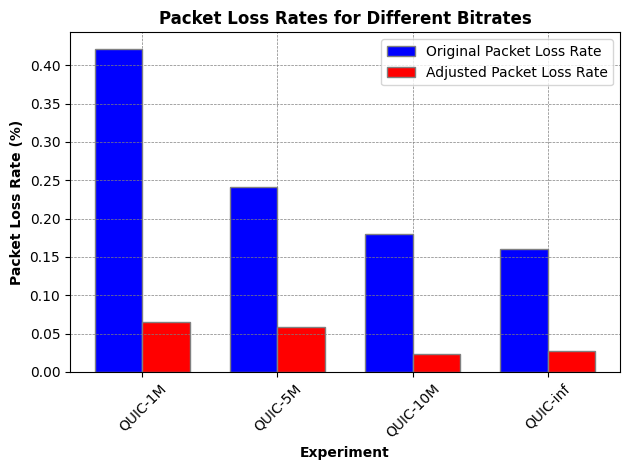

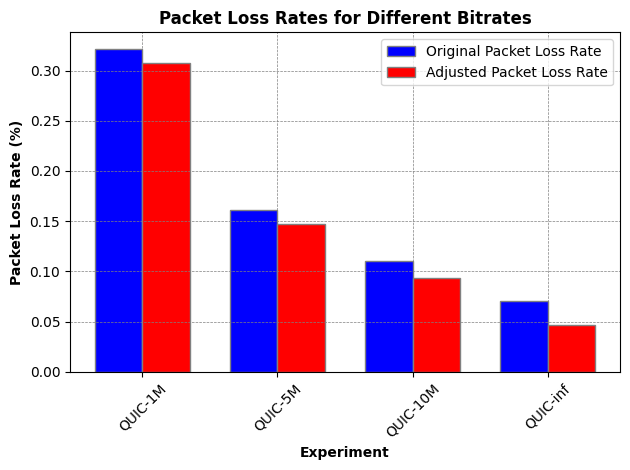

In [38]:
plot_packet_loss_rate(all_avg_ul_stats, "ul")
plot_packet_loss_rate(all_avg_dl_stats, "dl")

In [39]:
def plot_threshold_ratio(all_avg_stats, ul_dl):
    experiments = list(all_avg_stats.keys())
    original_packet_loss_rates = [all_avg_stats[exp]['reordering_pkl_rate(%)'] for exp in experiments]
    adjusted_packet_loss_rates = [all_avg_stats[exp]['time_pkl_rate(%)'] for exp in experiments]

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = range(len(experiments))
    r2 = [x + bar_width for x in r1]

    # Create the bars for original packet loss rate
    plt.bar(r1, original_packet_loss_rates, color='b', width=bar_width, edgecolor='grey', label='Reordering PKL Rate')

    # Create the bars for adjusted packet loss rate
    plt.bar(r2, adjusted_packet_loss_rates, color='r', width=bar_width, edgecolor='grey', label='Time PKL Rate')

    # Add xticks on the middle of the group bars
    plt.xlabel('Experiment', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(experiments))], experiments, rotation=45)

    # Add labels and title
    plt.ylabel('Packet Loss Rate (%)', fontweight='bold')
    plt.title(f'Triggered Threshold Rates for Different Bitrates({ul_dl})', fontweight='bold')

    # Add legend
    plt.legend()
    plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, zorder=0)

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{figure_path}/{ul_dl}_avg_threshold_pkl.png")
    plt.show()


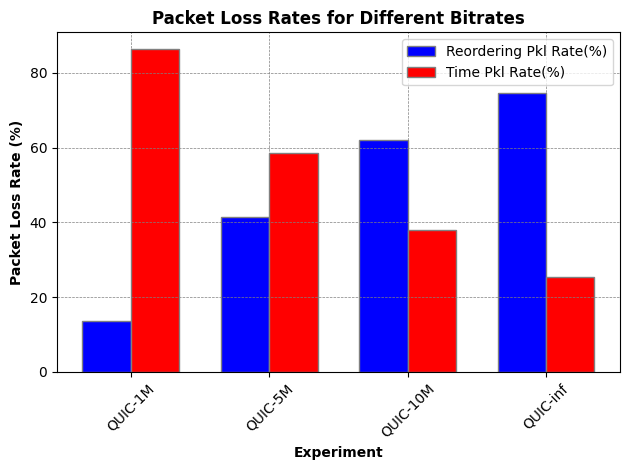

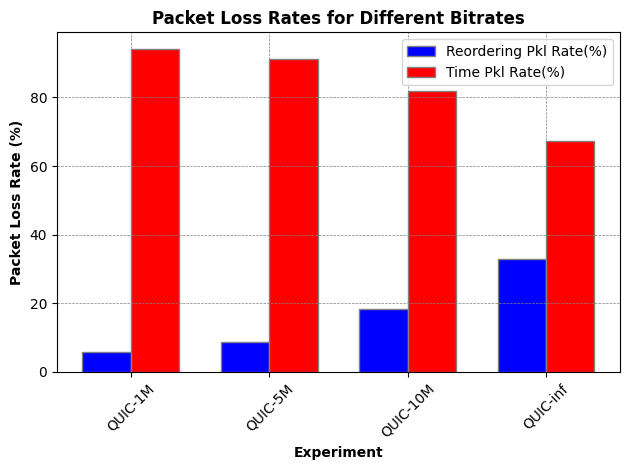

In [40]:
plot_threshold_ratio(all_avg_ul_stats, "ul")
plot_threshold_ratio(all_avg_dl_stats, "dl")

## UDP

In [10]:
### USER SETTINGS ###
database="/Volumes/mollyT7/MOXA"
# database = "/Volumes/MOLLY256/MOXA/"
# database = "/Users/molly/Desktop"

dates = [
    # "/Users/molly/Desktop/2024-01-26",
    # "2024-02-03",
    "2024-03-13",
    # "2024-03-21",
]
devices = sorted([
    "sm00",
    "sm01",
])
udp_exps = {
    "UDP-1M": (2, ["#{:02d}".format(i + 1) for i in range(2)]),
    "UDP-5M": (2, ["#{:02d}".format(i + 1) for i in range(2)]),
    "UDP-10M": (2, ["#{:02d}".format(i + 1) for i in range(2)]),
}

device_to_port = {"sm00": [3200, 3201], 
                  "sm01": [3202, 3203],
                  "sm02": [3204, 3205]}

figure_path = "/Users/molly/Desktop"

In [11]:
def find_loss_stats_files(database, date, exp, device):
    ul_files = []
    dl_files = []
    exp_rounds, exp_list = udp_exps[exp]
    ports = device_to_port.get(device, [])
    for exp_round in exp_list:
        folder_path = os.path.join(database, date, exp, device, exp_round, 'statistics')
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.startswith("udp_uplk_loss_statistics"):
                    ul_files.append(os.path.join(root, file))
                if file.startswith("udp_dnlk_loss_statistics"):
                    dl_files.append(os.path.join(root, file))
    return ul_files, dl_files

In [20]:
def calculate_avg_udp_stats(df):
    avg_total_packets = int(df['total_packet_sent'].mean())
    avg_packet_loss = int(df['total_packet_loss'].mean())
    
    return {"total_packet_sent": avg_total_packets,
            "total_packet_loss": avg_packet_loss,
            "packet_loss_rate(%)": avg_packet_loss*100 / avg_total_packets,
            "experiment_time(sec)": df['experiment_time(sec)'].mean()
            }

In [21]:

all_avg_udp_ul_stats = {}
all_avg_udp_dl_stats = {}
# Iterate over dates, exps, and devices
for exp in udp_exps:
    exp_udp_ul_stats_files = []
    exp_udp_dl_stats_files = []
    for date in dates:
        for device in devices:
            ul_stats_files, dl_stats_files = find_loss_stats_files(database, date, exp, device)
            exp_udp_ul_stats_files.extend(ul_stats_files)
            exp_udp_dl_stats_files.extend(dl_stats_files)
    stats = []
    # Iterate over each file path
    for file_path in exp_udp_ul_stats_files:
        # Read CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path, encoding="utf-8")
        stats.append(df)
    # Concatenate all DataFrames into a single DataFrame
    exp_ul_stats = pd.concat(stats, ignore_index=True)

    stats = []
    for file_path in exp_udp_dl_stats_files:
        df = pd.read_csv(file_path, encoding="utf-8")
        stats.append(df)
    exp_dl_stats = pd.concat(stats, ignore_index=True)

    all_avg_udp_ul_stats[exp] = calculate_avg_udp_stats(exp_ul_stats)
    all_avg_udp_dl_stats[exp] = calculate_avg_udp_stats(exp_dl_stats)

all_avg_udp_ul_stats


{'UDP-1M': {'total_packet_sent': 44843,
  'total_packet_loss': 62,
  'packet_loss_rate(%)': 0.1382601520861673,
  'experiment_time(sec)': 358.7313815},
 'UDP-5M': {'total_packet_sent': 216226,
  'total_packet_loss': 749,
  'packet_loss_rate(%)': 0.34639682554364415,
  'experiment_time(sec)': 345.96626125},
 'UDP-10M': {'total_packet_sent': 423218,
  'total_packet_loss': 676,
  'packet_loss_rate(%)': 0.15972855596879149,
  'experiment_time(sec)': 338.52887975}}

In [22]:
all_avg_udp_dl_stats

{'UDP-1M': {'total_packet_sent': 44843,
  'total_packet_loss': 709,
  'packet_loss_rate(%)': 1.581071739178913,
  'experiment_time(sec)': 358.73138125},
 'UDP-5M': {'total_packet_sent': 216226,
  'total_packet_loss': 4552,
  'packet_loss_rate(%)': 2.105204739485538,
  'experiment_time(sec)': 345.9662565},
 'UDP-10M': {'total_packet_sent': 423218,
  'total_packet_loss': 8275,
  'packet_loss_rate(%)': 1.9552571015410498,
  'experiment_time(sec)': 338.5288795}}

In [32]:
def plot_udp_packet_loss_rate(all_avg_stats, ul_dl):
    experiments = list(all_avg_stats.keys())
    packet_loss_rate = [all_avg_stats[exp]['packet_loss_rate(%)'] for exp in experiments]

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = range(len(experiments))
    r2 = [x + bar_width for x in r1]

    # Create the bars for original packet loss rate
    plt.bar(r1, packet_loss_rate, color='b', width=bar_width, edgecolor='grey', label='Packet Loss Rate')

    # Add xticks on the middle of the group bars
    plt.xlabel('Experiment', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(experiments))], experiments, rotation=45)

    # Add labels and title
    plt.ylabel('Packet Loss Rate (%)', fontweight='bold')
    plt.title('Packet Loss Rates for Different Bitrates', fontweight='bold')

    # Add legend
    plt.legend()
    plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, zorder=0)

    # Show plot
    plt.grid(True)
    plt.tight_layout()

    # plt.savefig(f"{figure_path}/{ul_dl}_avg_pkl_rate.png")
    plt.show()


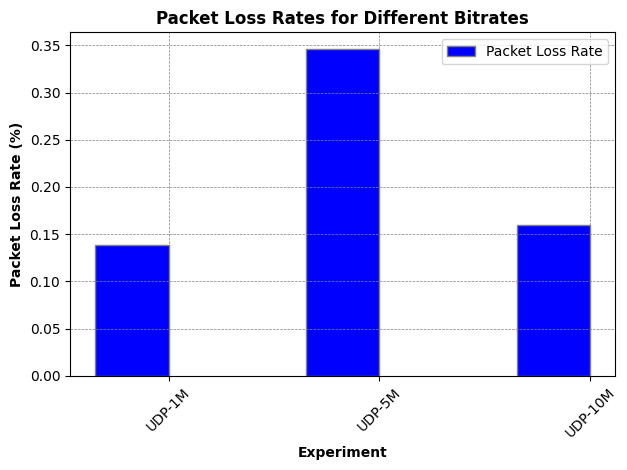

In [33]:
plot_udp_packet_loss_rate(all_avg_udp_ul_stats, "ul")

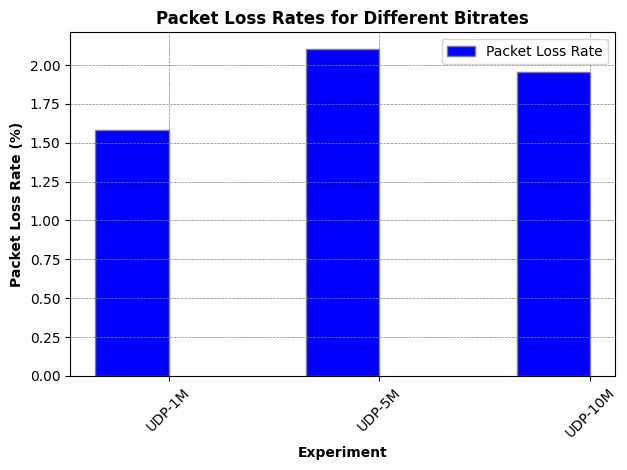

In [34]:
plot_udp_packet_loss_rate(all_avg_udp_dl_stats, "dl")

TESTING

In [25]:
# import json
# import csv

# def QlogToJsonEntry(file_path):
#     with open(file_path, 'r') as file:
#         lines = file.readlines()

#     # Add commas between lines
#     json_str = ",".join(lines)
#     # Surround the entire string with square brackets to create a JSON array
#     json_str = "[" + json_str + "]"
#     # Load the JSON array
#     json_entry = json.loads(json_str)
    
#     return json_entry

# def QlogToJson(json_entry, json_file_path):
#     with open(json_file_path, 'w') as json_file:
#         json.dump(json_entry, json_file, indent=2)

# def JsonToCsv(json_entry, csv_file_path):
#      # Open CSV file for writing
#     with open(csv_file_path, 'w', newline='') as csv_file:
#         # Create a CSV writer
#         csv_writer = csv.writer(csv_file)

#         # Write header row based on the keys of the second JSON object (assuming at least two objects are present)
#         if len(json_entry) >= 2:
#             header = list(json_entry[1].keys())
#             csv_writer.writerow(header)

#             # Write data rows starting from the second object
#             for entry in json_entry[1:]:
#                 csv_writer.writerow(entry.values())

In [26]:
# # sender_side_file
# sent_raw_path = "/Volumes/mollyT7/MOXA/test/log_20240415_1646_5203_server"
# sent_qlog_file_path = sent_raw_path + ".qlog"
# sent_json_file_path = sent_raw_path + ".json"
# sent_csv_file_path = sent_raw_path + ".csv"
# sent_json_entry = QlogToJsonEntry(sent_qlog_file_path)
# # QlogToJson(sent_json_entry, sent_json_file_path)
# JsonToCsv(sent_json_entry, sent_csv_file_path)

In [30]:
# dl_sender_df = pd.read_csv(sent_csv_file_path)
# dl_sent_df = dl_sender_df[(dl_sender_df['name'] == 'transport:packet_sent')]
# dl_received_df = dl_sender_df[(dl_sender_df['name'] == 'transport:packet_received')]

In [31]:
# print(len(dl_sent_df), len(dl_received_df))

375126 65456
